In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn import linear_model

In [8]:
df = pd.read_csv('week3.txt',comment="#", header=None)
X = df.iloc[:,:2]
y = df.iloc[:,2]

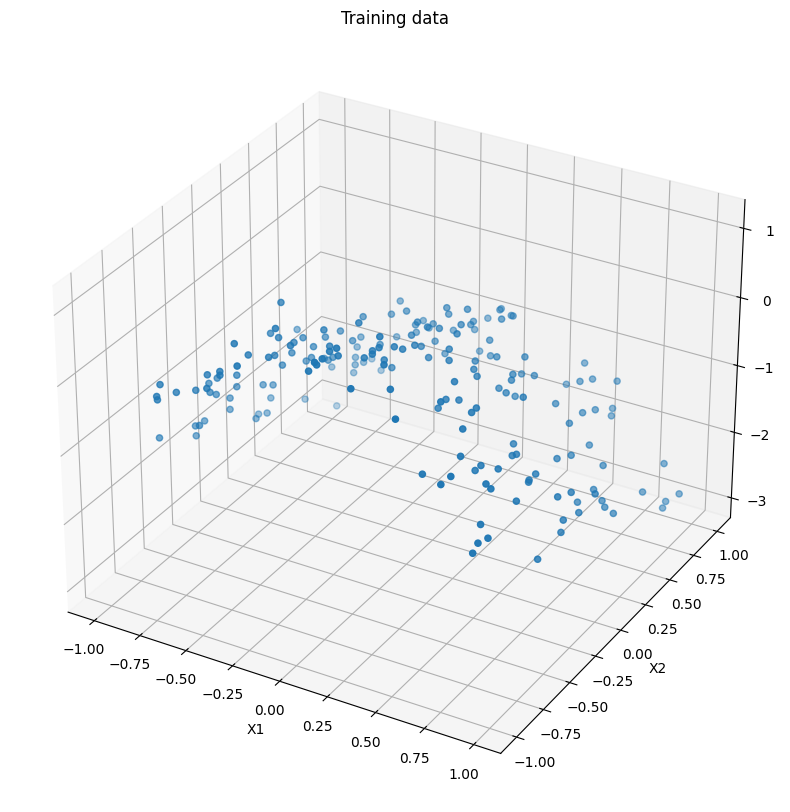

In [9]:
fig = plt.figure(figsize=(10, 10)) 
ax = fig.add_subplot(111, projection ='3d') 
ax.scatter(X[0], X[1] , y)
ax.set(title='Training data', xlabel='X1', ylabel='X2', zlabel='Y')
plt.show()

In [10]:
poly = PolynomialFeatures(degree=5)
X5poly = poly.fit_transform(X)

for f in poly.get_feature_names_out():
  print(f)

C_range = [1, 10, 1000, 10000]
for C in C_range:
    model = Lasso(alpha=1/(2*C)).fit(X5poly, y)
    theta = model.coef_
    theta0 = model.intercept_
    y_pred = model.predict(X5poly)
    j = mean_squared_error(y, y_pred)
    print(f"C = {C}\nmse = {j:.4f}\n")
    print(f'theta = {theta}\ntheta0 = {theta0}\n')

1
x0
x1
x0^2
x0 x1
x1^2
x0^3
x0^2 x1
x0 x1^2
x1^3
x0^4
x0^3 x1
x0^2 x1^2
x0 x1^3
x1^4
x0^5
x0^4 x1
x0^3 x1^2
x0^2 x1^3
x0 x1^4
x1^5
C = 1
mse = 0.7251

theta = [ 0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0.]
theta0 = -0.6674421439324679

C = 10
mse = 0.0818

theta = [ 0.         -0.         -0.86594124 -1.50202448 -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.        ]
theta0 = -0.14973970090816424

C = 1000
mse = 0.0429

theta = [ 0.         -0.03061585 -1.05258724 -2.06786679 -0.07360959 -0.
 -0.         -0.          0.          0.          0.         -0.
 -0.          0.11961047 -0.06866554  0.07756016  0.0085111  -0.00577164
  0.          0.01181523  0.        ]
theta0 = 0.05742499257444211

C = 10000
mse = 0.0418

theta = [ 0.          0.00395004 -1.03492648 -2.1681133  -0.13016784  0.07198767
 -0.34503859 -0.3192784

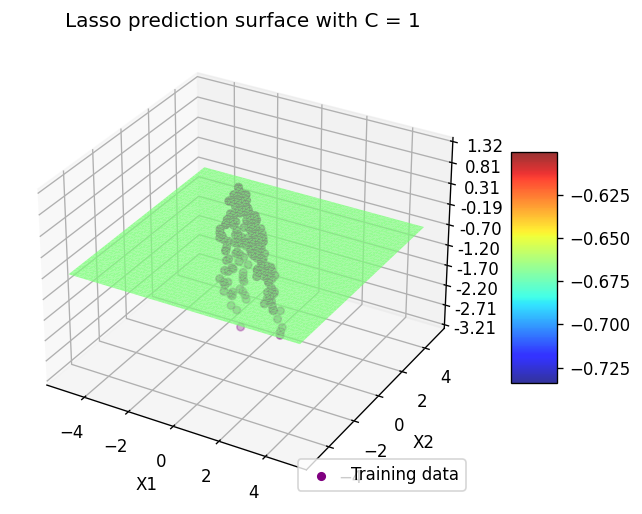

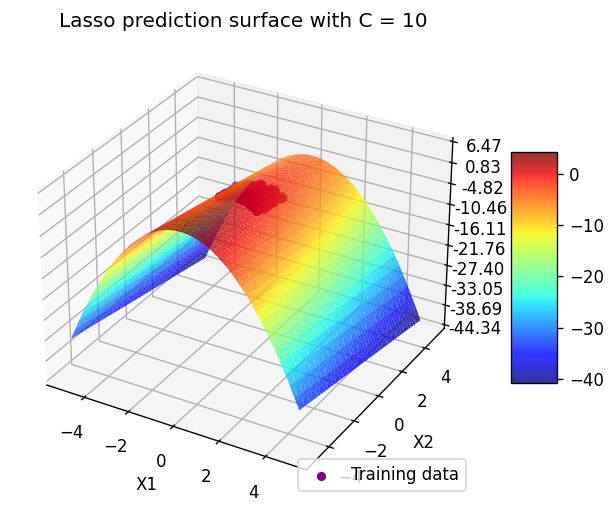

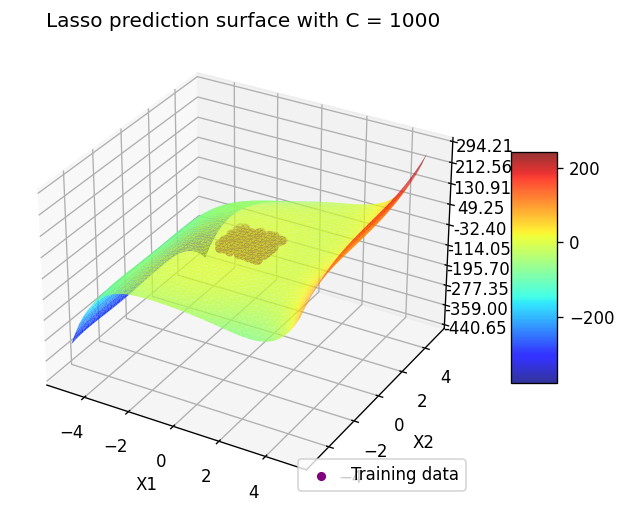

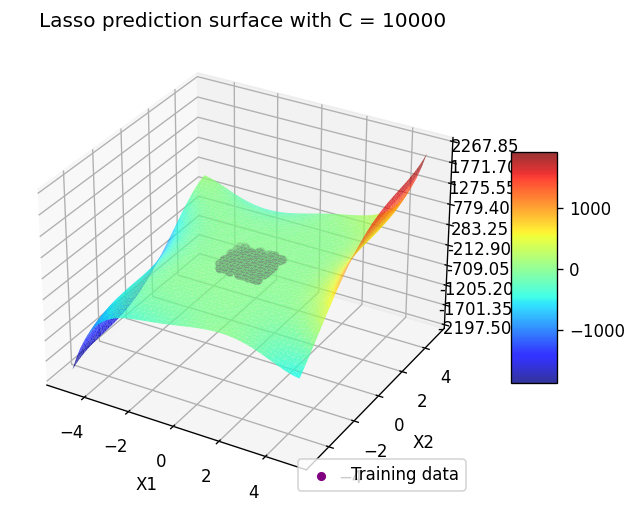

In [12]:
Xtest = []
grid = np.linspace(-5,5)
for i in grid:
    for j in grid:
        Xtest.append([i,j])

Xtest = np.array(Xtest)
Xtest = PolynomialFeatures(5).fit_transform(Xtest)

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

C_range = [1, 10, 1000, 10000]
for C in C_range:
    model = Lasso(alpha=1/(2*C))
    model.fit(X5poly, y)
    Z = model.predict(Xtest)
    fig = plt.figure(figsize=(8, 5), dpi=120)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[0], X[1], y, c='purple', label="Training data")
    surf = ax.plot_trisurf(Xtest[:,1], Xtest[:,2], Z, 
                           cmap=cm.jet, alpha=0.8, linewidth=0, antialiased=True)
    ax.set_title(f'Lasso prediction surface with C = {C}')
    # Customize the z axis.
    ax.zaxis.set_major_locator(LinearLocator(10))
    # A StrMethodFormatter is used automatically
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set(xlabel='X1', ylabel='X2', zlabel='Y')
    ax.legend(loc='lower right')
    plt.show()

C = 1e-07
mse = 0.7251

theta = [ 0.00000000e+00 -1.09647910e-06 -1.20020623e-05 -6.98954233e-06
 -4.02898578e-07 -5.37844106e-07 -8.83936363e-07 -4.29959280e-06
 -4.26107135e-07 -7.55798857e-06 -6.12915606e-06 -3.90163144e-07
 -2.27554189e-06 -2.55428203e-07 -6.41729852e-07 -7.29220833e-07
 -2.66254735e-06 -3.57286176e-07 -2.85247908e-06 -2.04095069e-07
 -5.64975155e-06]
theta0 = -0.6674378084360448



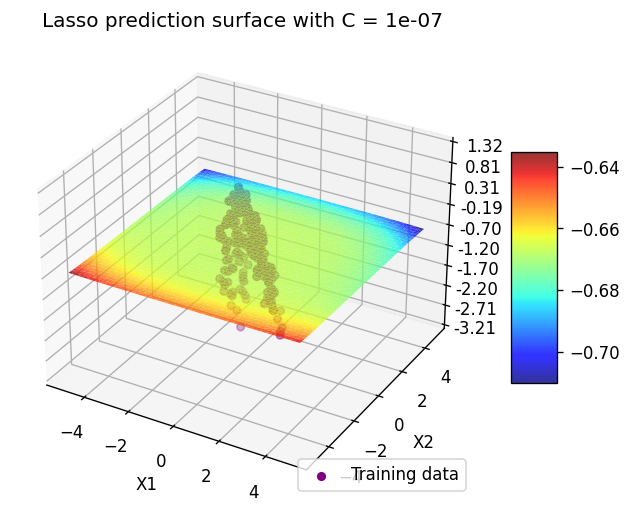

C = 1e-05
mse = 0.7233

theta = [ 0.00000000e+00 -1.09345848e-04 -1.19754595e-03 -6.98573268e-04
 -4.00578451e-05 -5.36716469e-05 -8.81980215e-05 -4.28918474e-04
 -4.25544411e-05 -7.54003331e-04 -6.12536530e-04 -3.88345138e-05
 -2.27403792e-04 -2.53345145e-05 -6.40678625e-05 -7.27660718e-05
 -2.65589049e-04 -3.57091641e-05 -2.84527212e-04 -2.04116146e-05
 -5.63575022e-04]
theta0 = -0.6670088978809444



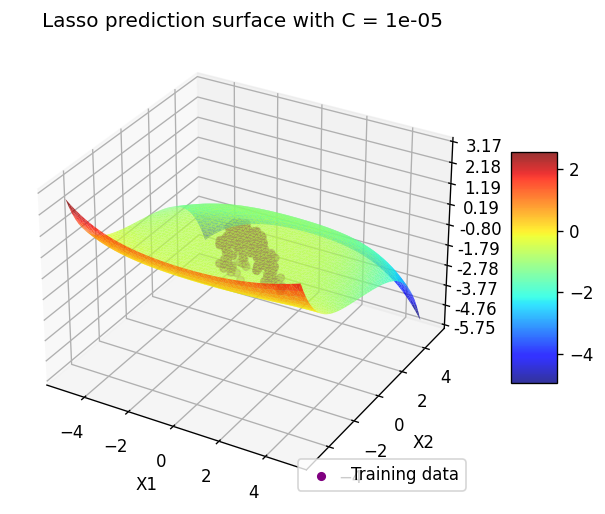

C = 0.1
mse = 0.0600

theta = [ 0.00000000e+00 -1.35443455e-02 -7.72295230e-01 -1.06042172e+00
 -1.73953142e-02  2.36536033e-02  3.49005858e-04 -1.13203264e-01
  2.22749144e-03 -2.15522438e-01 -7.26509218e-01 -1.01561510e-03
 -2.40102839e-01  5.95142371e-02 -2.46576227e-02  3.28310760e-02
 -1.95283989e-03 -1.92436108e-02  1.28663919e-02  2.99070616e-04
 -6.03935024e-02]
theta0 = -0.12504155175548604



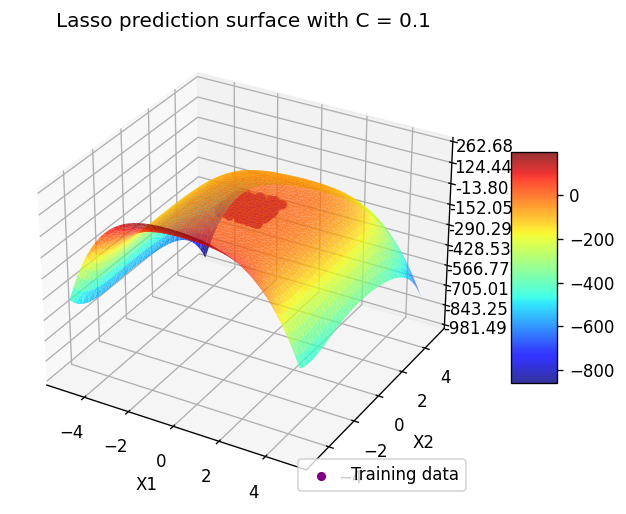

C = 1
mse = 0.0441

theta = [ 0.         -0.03430445 -0.98140241 -1.67284647 -0.08498967  0.05909102
 -0.05934594 -0.17358945  0.02224946 -0.10741457 -0.36843846 -0.012031
 -0.12367714  0.13116568 -0.10021716  0.16401253  0.15727365 -0.09720448
  0.08616842  0.08903423  0.0390254 ]
theta0 = -0.0009510319698944336



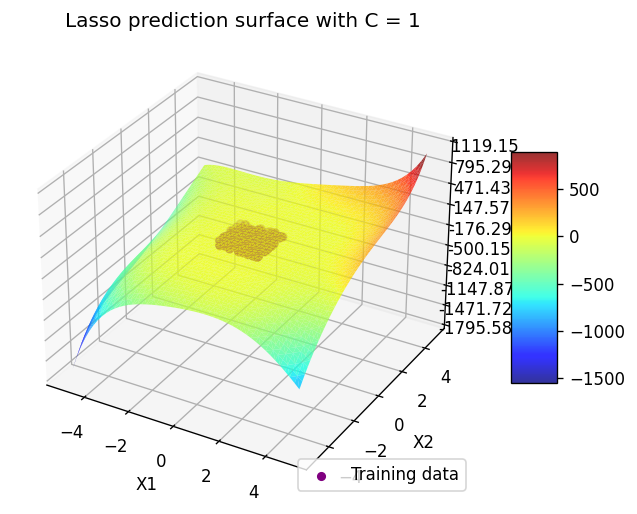

In [15]:
C_range = [1e-7, 1e-5, 1e-1, 1]
for C in C_range:
    model = Ridge(alpha=1/(2*C)).fit(X5poly, y)
    theta = model.coef_
    theta0 = model.intercept_
    y_pred = model.predict(X5poly)
    j = mean_squared_error(y, y_pred)
    print(f"C = {C}\nmse = {j:.4f}\n")
    print(f'theta = {theta}\ntheta0 = {theta0}\n')
    
    model.fit(X5poly, y)
    Z = model.predict(Xtest)
    fig = plt.figure(figsize=(8, 5), dpi=120)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[0], X[1], y, c='purple', label="Training data")
    surf = ax.plot_trisurf(Xtest[:,1], Xtest[:,2], Z, 
                           cmap=cm.jet, alpha=0.8, linewidth=0, antialiased=True)
    ax.set_title(f'Lasso prediction surface with C = {C}')
    # Customize the z axis.
    ax.zaxis.set_major_locator(LinearLocator(10))
    # A StrMethodFormatter is used automatically
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set(xlabel='X1', ylabel='X2', zlabel='Y')
    ax.legend(loc='lower right')
    plt.show()

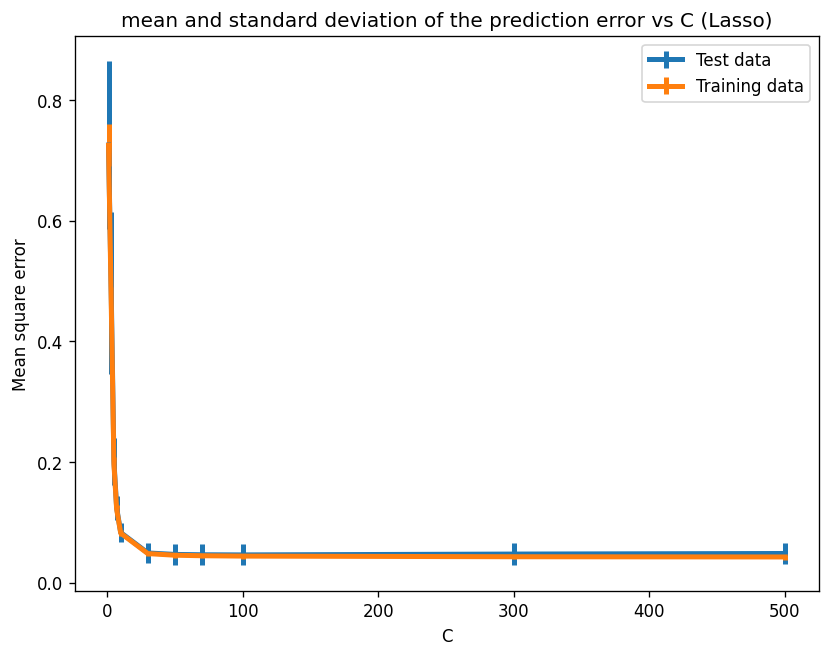

In [17]:
test_std = []
test_mean = []
train_std = []
train_mean = []

plt.figure(figsize=(8, 6), dpi=120)

C_range = [1, 3, 5, 7, 10, 30, 50, 70, 100, 300, 500]
kfcv = KFold(n_splits=5)

for C in C_range:
    model = Lasso(alpha=1/(2*C))
    
    test_mse = []
    train_mse = []
    for train, test in kfcv.split(X5poly):
        model.fit(X5poly[train], y[train])
        y_pred_test = model.predict(X5poly[test])
        y_pred_train = model.predict(X5poly[train])
        
        test_mse.append(mean_squared_error(y[test], y_pred_test))
        train_mse.append(mean_squared_error(y[train], y_pred_train))

    test_mean .append(np.mean(test_mse))
    test_std.append(np.std(test_mse))
    train_mean.append(np.mean(train_mse))
    train_std.append(np.std(train_mse))

plt.errorbar(C_range, test_mean, yerr=test_std, linewidth=3, label="Test data")
plt.errorbar(C_range, train_mean, yerr=train_std, linewidth=3, label="Training data")
plt.title("mean and standard deviation of the prediction error vs C (Lasso)")
plt.xlabel('C')
plt.ylabel("Mean square error")
plt.legend()
plt.show()

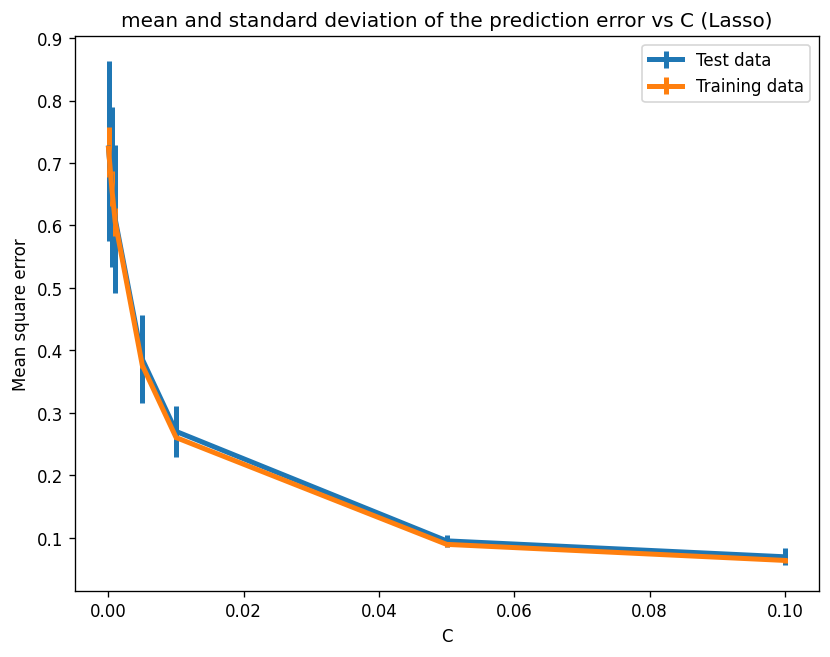

In [18]:
test_std = []
test_mean = []
train_std = []
train_mean = []

plt.figure(figsize=(8, 6), dpi=120)

C_range = [1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1]
kfcv = KFold(n_splits=5)

for C in C_range:
    model = Ridge(alpha=1/(2*C))
    
    test_mse = []
    train_mse = []
    for train, test in kfcv.split(X5poly):
        model.fit(X5poly[train], y[train])
        y_pred_test = model.predict(X5poly[test])
        y_pred_train = model.predict(X5poly[train])
        
        test_mse.append(mean_squared_error(y[test], y_pred_test))
        train_mse.append(mean_squared_error(y[train], y_pred_train))

    test_mean .append(np.mean(test_mse))
    test_std.append(np.std(test_mse))
    train_mean.append(np.mean(train_mse))
    train_std.append(np.std(train_mse))

plt.errorbar(C_range, test_mean, yerr=test_std, linewidth=3, label="Test data")
plt.errorbar(C_range, train_mean, yerr=train_std, linewidth=3, label="Training data")
plt.title("mean and standard deviation of the prediction error vs C (Lasso)")
plt.xlabel('C')
plt.ylabel("Mean square error")
plt.legend()
plt.show()